# 1- Importando Bibliotecas

In [1]:
import pandas                  as pd
import matplotlib.pyplot       as plt
import seaborn                 as sns

from sklearn.tree              import DecisionTreeClassifier
from sklearn.model_selection   import train_test_split
from sklearn.metrics           import confusion_matrix
from sklearn.metrics           import ConfusionMatrixDisplay
from sklearn.metrics           import accuracy_score
from sklearn.metrics           import precision_score, recall_score

# 2- Importando os dados

In [2]:
data = '/Users/fernanda/Library/Mobile Documents/com~apple~CloudDocs/portfolio/fraude.csv'
df = pd.read_csv(data)
df1 = df.copy()

# 3- Conhecendo os dados

Este conjunto de dados contém transações de cartão de crédito realizadas por titulares de cartões europeus no ano de 2023.

O objetivo principal deste conjunto de dados é facilitar o desenvolvimento de algoritmos e modelos de detecção de fraude para identificar transações potencialmente fraudulentas.

**Colunas**:
- **id** : identificador exclusivo para cada transação,
- **V1-V28** : recursos anonimizados que representam vários atributos da transação (por exemplo, hora, local, etc.),
- **Valor** : o valor da transação,
- **Classe** : rótulo binário que indica se a transação é fraudulenta (1) ou não (0)

# 4- Limpeza e tratamento dos dados

In [3]:
df1.head(3)

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0


In [4]:
#Checando valores nulos
df1.isnull().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
#Retirando a coluna 'id'
df1=df1.drop('id',axis=1)

In [6]:
df1.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [8]:
#Tamanho do DF

print(f'Número de linhas: {df1.shape[0]}')
print(f'Número de colunas: {df1.shape[1]}')

Número de linhas: 568630
Número de colunas: 30


<AxesSubplot: >

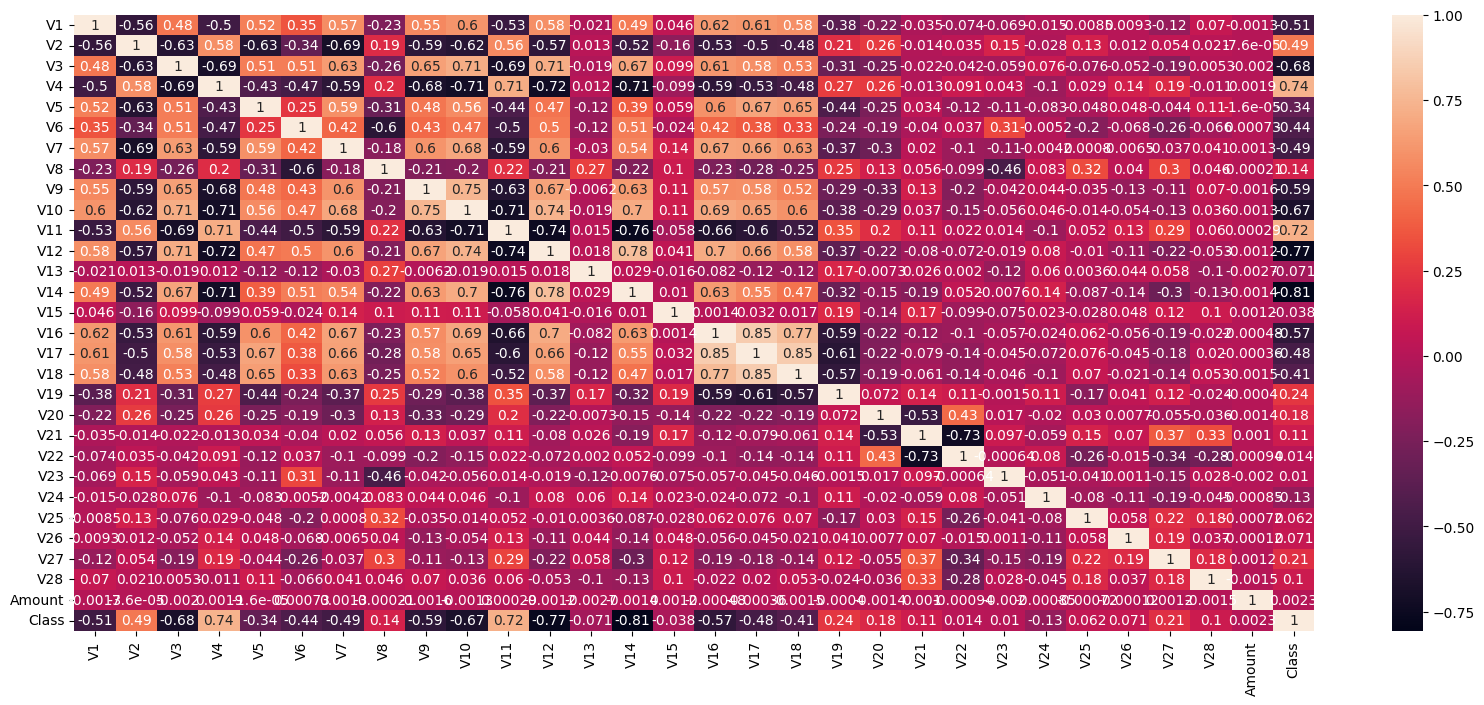

In [9]:
#Correlação das variáveis 
  
plt.rcParams['figure.figsize'] = (20,8)
ax = sns.heatmap(df1.corr(), annot=True)
ax

# 5- Análises gráficas

Text(0, 0.5, 'Class')

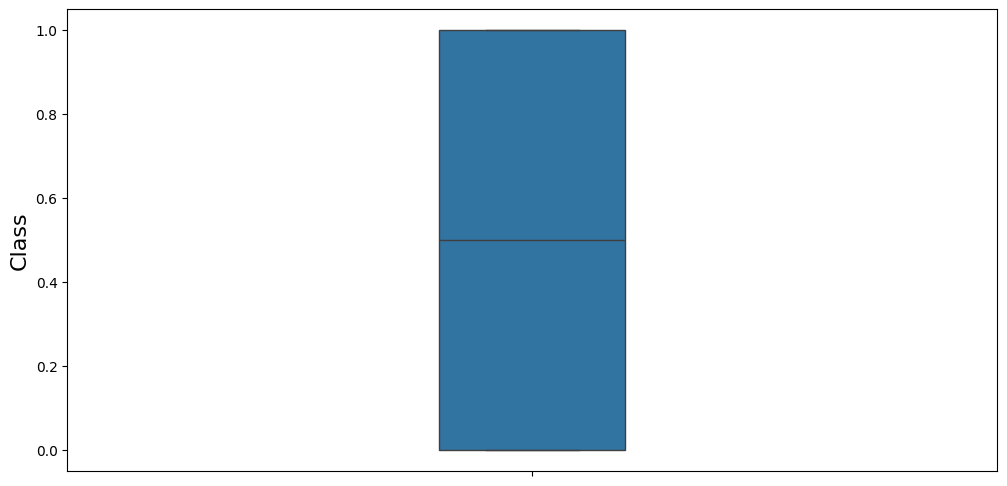

In [10]:
#BoxPlot da variável dependente(y)
ax = sns.boxplot(data=df1['Class'], width=0.2)

#Formatação do tamanho
ax.figure.set_size_inches(12,6)
 
#lables dos eixos
ax.set_ylabel('Class', fontsize=16)

/var/folders/zh/064dhp151fs045_t5cr7fjwc0000gn/T/ipykernel_75845/678680793.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df1['Class'])


<AxesSubplot: title={'center': 'Distribuição de Frequências'}, xlabel='Class', ylabel='Density'>

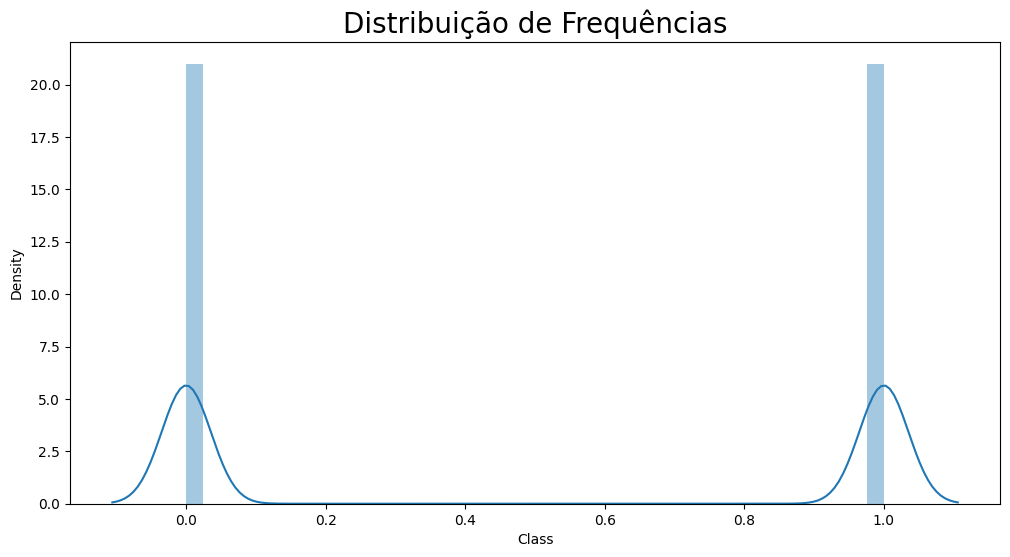

In [11]:
#Distribuição de frequências da variável Alvo (y)
ax = sns.distplot(df1['Class'])
ax.figure.set_size_inches(12,6)

#titulo
ax.set_title('Distribuição de Frequências', fontsize=20)
ax

# 6- Separando os dados para o modelo

In [12]:
#Separando as variáveis explicativas(x) e dependente/alvo(y)
X=df1.drop(['Class'],axis=1)
y=df1['Class']
  
#Criando dataset de treino
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=5)
#dados de treino e validação\n",
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify = y, random_state = 5)
    
print(f'O treino foi realizado com {len(X_train)} elementos.')
print(f'A validação foi realizada com {len(X_val)} elementos.')
print(f'O teste foi realizado com {len(X_test)} elementos.')
print('A soma dos dados de treino e teste é de',(len(X_test) + len(X_train)),'elementos.')

O treino foi realizado com 426472 elementos.
A validação foi realizada com 142158 elementos.
O teste foi realizado com 170589 elementos.
A soma dos dados de treino e teste é de 597061 elementos.


# 7- Modelo DecisionTreeClassifier

In [13]:
DecisionTreeClassifier(max_depth=10)

#Treinando o modelo com dados de treino
modelo = DecisionTreeClassifier(max_depth = 10)
modelo.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

## Técnica RFECV 

In [14]:
from sklearn.feature_selection import RFECV


#Separando o x e o y 
X = df1.drop(['Class'],axis=1)
y = df1['Class']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3, random_state=123)


#Modelo RandomForestClassifier(3) 
modelo = DecisionTreeClassifier(max_depth = 10)
modelo.fit(X_train, y_train)


#treinando as melhores variáveis com o método RFE
selecionador_rfecv = RFECV(estimator = modelo, cv = 5, scoring = "accuracy", step = 1)
selecionador_rfecv.fit(X_train, y_train)

#gerando novos dados de treino e teste
train_rfecv = selecionador_rfecv.transform(X_train)
test_rfecv = selecionador_rfecv.transform( X_test)

#treinando os dados com o modelo 
modelo.fit(train_rfecv, y_train)


print(f'A acurácia do modelo DecisionTreeClassifier com a técnica RFECV é de: {modelo.score(test_rfecv, y_test).round(4)*100}%')

A acurácia do modelo DecisionTreeClassifier com a técnica RFECV é de: 98.71%


In [24]:
#As variáveis selecionadas pelo modelo:
X_train.columns[selecionador_rfecv.support_].shape

(29,)

# 8- Métricas do modelo

In [15]:
#Acuracia de treino
modelo.score(X_train, y_train)
print(f'Acurácia de treino: {modelo.score(X_train, y_train)}')

Acurácia de treino: 0.9876369519722843


/Users/fernanda/anaconda3/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/Users/fernanda/anaconda3/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [16]:
#Acuracia de validação
modelo.score(X_val, y_val)
print(f'Acurácia de validação: {modelo.score(X_val, y_val)}')

Acurácia de validação: 0.987436514300989


/Users/fernanda/anaconda3/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/Users/fernanda/anaconda3/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


/Users/fernanda/anaconda3/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


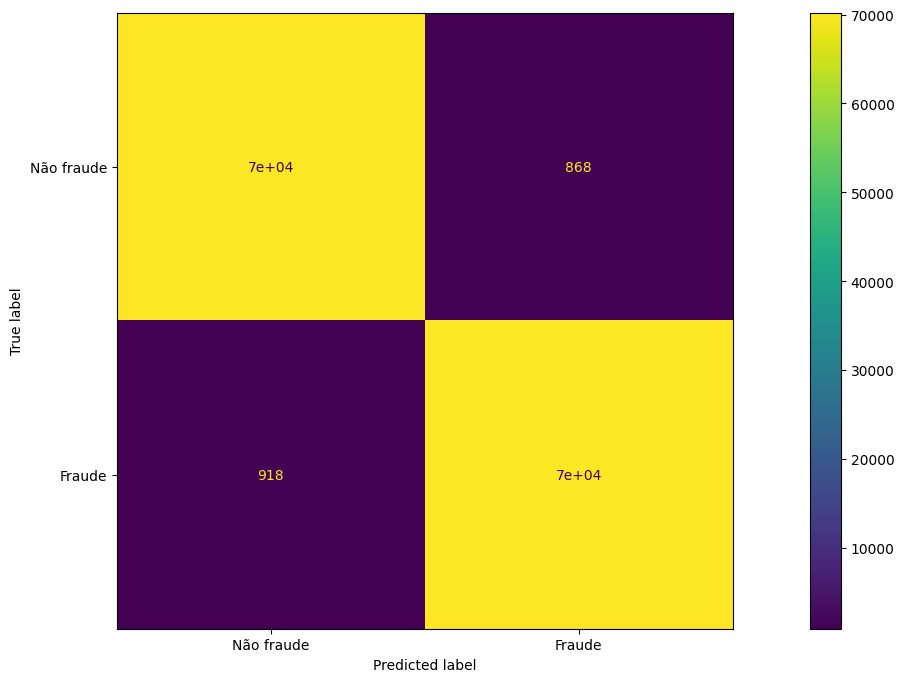

In [17]:
#Matriz de confusão com os dados de validação
y_previsto = modelo.predict(X_val)
matriz_confusao = confusion_matrix(y_val, y_previsto)

# plotando e configurando as lables do gráfico
visualizacao = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao, display_labels=['Não fraude', 'Fraude'])
visualizacao.plot()

No gráfico acima vemos que:
   
- Das transações que o modelo disse que NÃO iriam ser fraudulentas ele acertou 70.000 e errou 1073.
- Das transações que o modelo disse que IRIAM ser fraudulentas ele acertou 70.000 e errou 969.
   
**Neste caso o modelo está performando bem pois em um total de fraudes reais (70.000 + 1073 = 71.073 transações) o modelo só identificou 70.00 dessas.**

In [18]:
#Precision
precision_score(y_val, y_previsto)
print(f'Precisão: {precision_score(y_val, y_previsto)}')

Precisão: 0.9877796393022569


In [19]:
#Recall
recall_score(y_val, y_previsto)
print(f'Recall: {recall_score(y_val, y_previsto)}')

Recall: 0.9870847929768286
